In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date1='ut20160811'
obs_date2='ut20160922'
obj_name='Wasp52'

midtime1=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
midtime2=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path1='/Volumes/ermay_ext/Magellan/'+obs_date1+'/'
path2='/Volumes/ermay_ext/Magellan/'+obs_date2+'/'

#data_path=path+obj_name+'_Spec/'      #path to where your data is saved
#flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
#DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
#FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
#WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH1=path1+'SaveData_'+obj_name+'/'
SAVEPATH2=path2+'SaveData_'+obj_name+'/'

#wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

2048 4096


In [2]:
import pickle

W52=pickle.load(open(SAVEPATH1+'PLOTS/models/wasp52b.pickle'))
W52_spec=W52['spectra']
Tetal_rads=(((W52_spec['data_1'])['high'])['depth'])**(1./2.)
Tetal_errs=(((W52_spec['data_1'])['high'])['error'])
Tetal_errs=(0.5*Tetal_rads**(-1./2.))*Tetal_errs

Tetal_wavs=((W52_spec['data_1'])['high'])['wavelength']*10000.
Tetal_widt=((W52_spec['data_1'])['high'])['width']

Letal_wavs=np.linspace(4125,8625,19)
Letal_rads=np.array([0.1643,0.1632,0.1656,0.1641,0.1629,0.1619,0.1641,0.1639,0.1638,0.1640,0.1630,0.1645,0.1646,0.1652,0.1651,0.1660,0.1658,0.1664,0.1675])
Letal_errs=np.array([14,13,12,10,9,8,11,10,7,9,6,7,8,8,8,6,7,16,16])/10000.

Cetal_wavs=np.array([5306,5471,5636,5800,5891,5981,6147,6312,6477,6642,6807,6972,7137,7302,7467,7665,7682,7699,7790,7955,8120,8285,8450,8615,8780,8945])
Cetal_widt=np.array([165,165,165,165,16,165,165,165,165,165,165,165,165,165,165,16,18,16,165,165,165,165,165,165,165,165])
Cetal_rads=np.array([0.1624,0.1624,0.1608,0.1588,0.1717,0.1596,0.1610,0.1611,0.1604,0.1616,0.1617,0.1635,0.1613,0.1614,0.1608,0.1651,0.1608,0.1626,0.1623,0.1595,0.1609,0.1598,0.1609,0.1599,0.1612,0.1606])
Cetal_errs=np.array([15,16,19,11,30,16,9,8,8,7,11,12,11,11,9,20,21,21,11,11,12,10,12,16,16,16])/10000.

Cetal_rads+=0.004

(4000, 8000)

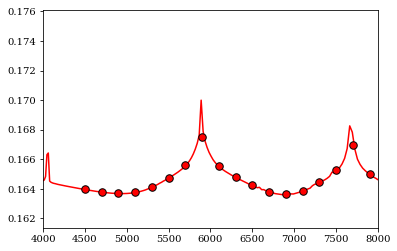

In [3]:
start=4400
end=9000
width=200

R=4
P=30

from Binning_Model import BinFunc
from scipy.interpolate import interp1d


#exo_w=np.genfromtxt(SAVEPATH1+'PLOTS/models/W52_noK.dat',usecols=[0],skip_header=1)*10**10.
#exo_d=(np.genfromtxt(SAVEPATH1+'PLOTS/models/W52_noK.dat',usecols=[1],skip_header=1)/100.)**(1./2.)

exo_w=np.genfromtxt(SAVEPATH1+'PLOTS/models/Wasp52.dat',usecols=[0],skip_header=1)*10**10.
exo_d=(np.genfromtxt(SAVEPATH1+'PLOTS/models/Wasp52.dat',usecols=[1],skip_header=1)/100.)**(1./2.)

exo_w_R=np.empty([len(exo_w)/R])
exo_d_R=np.empty([len(exo_d)/R])

exo_w_P=np.empty([len(exo_w)/P])
exo_d_P=np.empty([len(exo_d)/P])

new_wave=np.linspace(start,end,(end-start)*10)
func=interp1d(exo_w,exo_d)
new_counts=func(new_wave)


z=0
for w in range(0,len(exo_w_R)):
    exo_w_R[w]=np.nanmedian(exo_w[z:z+R])
    exo_d_R[w]=np.nanmedian(exo_d[z:z+R])
    z+=R
    
z=0
for w in range(0,len(exo_w_P)):
    exo_w_P[w]=np.nanmedian(exo_w[z:z+P])
    exo_d_P[w]=np.nanmedian(exo_d[z:z+P])
    z+=P

#exo_w_P,exo_d_P=BinFunc(exo_d,exo_w,start,end,width)
exo_w_P,exo_d_P=BinFunc(new_counts,new_wave,start,end,width,True)

plt.clf()
plt.cla()
plt.plot(exo_w_R,exo_d_R,color='red')
plt.plot(exo_w_P,exo_d_P,'.',markerfacecolor='red',markeredgecolor='black',markersize=15)
plt.xlim(4000,8000)
#plt.ylim(0.14,0.18)

In [4]:
def ComNights(x,dx,y,dy):
    d=np.zeros_like(x)
    dd=np.zeros_like(x)
    for i in range(0,len(d)):
        d[i]=np.nansum([x[i]/dx[i]**2.,y[i]/dy[i]**2.])/np.nansum([1./dx[i]**2.,1./dy[i]**2.])
        dd[i]=np.sqrt(1./np.nansum([1./dx[i]**2.,1./dy[i]**2.]))
    return d,dd

[0.00126447 0.0011057  0.00097764 0.00094093 0.00090747 0.00089855
 0.00088182 0.0008763  0.0008731  0.00087046 0.00107851 0.00093512
 0.0008746  0.00089813 0.00091617 0.00101712 0.00096523 0.00100465
 0.00103958 0.00108105 0.00115056 0.00111442 0.00133112]
[0.00081629 0.0012297  0.0009921  0.00095984 0.00092834 0.00092373
 0.00090488 0.00089994 0.00089548 0.00089516 0.0011033  0.00095422
 0.00089285 0.00091169 0.00094375 0.00101978 0.00096657 0.00100142
 0.00102789 0.00106783 0.00113259 0.00109549 0.00130803]


/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


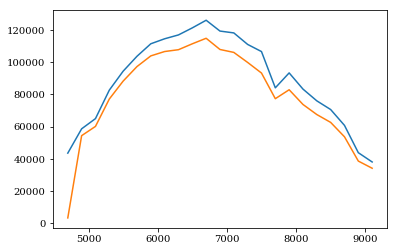

In [5]:
t1=np.load(SAVEPATH1+'Binned_Data_200.npz')['bin_counts']
t2=np.load(SAVEPATH2+'Binned_Data_200.npz')['bin_counts']

bin_ctr_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']
bin_ctr_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['bin_ctr']

t1=np.nanmedian(t1,axis=1)
t2=np.nanmedian(t2,axis=1)


plt.plot(bin_ctr_200_1,t1[0,:])
plt.plot(bin_ctr_200_2,t2[0,:])

errs_1=np.sqrt(t1[0,:])/(t1[3,:]+t1[5,:]+t1[8,:])
errs_2=np.sqrt(t2[0,:])/(t2[3,:]+t2[5,:]+t2[8,:])

print errs_1
print errs_2

In [6]:
ne=t1[0,:]
print ne
print 1./np.sqrt(ne)
print 10**6./np.sqrt(ne)

[ 43579.46674338  58653.64426956  64973.90877439  82625.70514819
  94379.34094582 103627.78261081 111385.99855266 114482.21661234
 116878.29025027 121241.71627003 125977.48756163 119263.77484621
 118119.39134562 110979.38813521 106557.776059    84070.28835138
  93327.65660398  83277.75311797  75995.73643807  70606.57607016
  60775.51931098  43844.3236618   38090.90217565]
[0.00479026 0.00412907 0.00392311 0.0034789  0.00325508 0.00310643
 0.0029963  0.0029555  0.00292505 0.00287193 0.00281743 0.00289565
 0.00290964 0.00300178 0.00306343 0.00344889 0.00327337 0.00346526
 0.00362748 0.00376337 0.00405635 0.00477577 0.00512377]
[4790.25953633 4129.07241529 3923.11015681 3478.90372729 3255.07897437
 3106.43232897 2996.29589106 2955.50014617 2925.048524   2871.93074047
 2817.43255588 2895.64771507 2909.64094649 3001.77984284 3063.42622623
 3448.88514338 3273.36790161 3465.2574064  3627.48300197 3763.37438092
 4056.35224123 4775.76900325 5123.76697945]


# Read in DATA


In [7]:
width=100


#mfile='HATS8b_1em1S.dat'
#model=(np.genfromtxt(SAVEPATH+mfile,usecols=[1],skip_header=2)/100)**(1./2.)
#mwave=np.genfromtxt(SAVEPATH+mfile,usecols=[0],skip_header=2)*10**10.


from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import os

### night 1

bin_ctr_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']
dt_e_p_200_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_200.npz')['err_p'],axis=0)
dt_e_t_200_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_200.npz')['err_t'],axis=0)
             
rp_200_1=np.empty([len(bin_ctr_200_1)])
rp_e_200_1=np.empty([len(bin_ctr_200_1)])

bin_ctr_1=np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
dt_e_p_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['err_p'],axis=0)
dt_e_t_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['err_t'],axis=0)
             
rp_1=np.empty([len(bin_ctr_1)])
rp_e_1=np.empty([len(bin_ctr_1)])

### night 2

bin_ctr_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['bin_ctr']
             
rp_200_2=np.empty([len(bin_ctr_200_2)])
rp_e_200_2=np.empty([len(bin_ctr_200_2)])

bin_ctr_2=np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']

             
rp_2=np.empty([len(bin_ctr_2)])
rp_e_2=np.empty([len(bin_ctr_2)])


print len(bin_ctr_1)
print len(bin_ctr_2)

rbwhite_1=(np.load(SAVEPATH1+'LightCurve_fits_white.npz')['params'])[2]
rbwhite_2=(np.load(SAVEPATH2+'LightCurve_fits_white.npz')['params'])[2]

yerr_binns_1=np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['rmse']
yerr_binns_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['rmse']

yerr_binns_2=np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['rmse']
yerr_binns_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['rmse']


b=0
for file in os.listdir(SAVEPATH1+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_1):
            rbwhite_1=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp_1[b]=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0])
            
            b+=1
            
b=1
for file in os.listdir(SAVEPATH1+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200_1):
            rbwhite_200_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[2]
        else:
            rp_200_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[2]
            rp_e_200_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_200/'+file)['paramserr'])[0])

            b+=1
            
            
b=0
for file in os.listdir(SAVEPATH2+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_2):
            rbwhite_2=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp_2[b]=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0])
            
            b+=1
            
b=0
for file in os.listdir(SAVEPATH2+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200_2):
            rbwhite_200_2=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[2]
        else:
            rp_200_2[b]=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[2]
            rp_e_200_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_200/'+file)['paramserr'])[0])

            b+=1

45
45


In [8]:
print '----------------'
print '   * NIGHT 1 *  '
print '----------------'
print '|   200 WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_200_1
print 'Rp/Rs: ', rp_200_1
print 'ERROR: ', rp_e_200_1
print 'e PPM: ', rp_e_200_1*10**6.

print '----------------'
print '|   '+str(int(width))+' WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_1
print 'Rp/Rs: ', rp_1
print 'ERROR: ', rp_e_1
print 'e PPM: ', rp_e_1*10**6.
print '----------------'
print '   * NIGHT 2 *  '
print '----------------'
print '|   200 WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_200_2
print 'Rp/Rs: ', rp_200_2
print 'ERROR: ', rp_e_200_2
print 'e PPM: ', rp_e_200_2*10**6.

print '----------------'
print '|   '+str(int(width))+' WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_2
print 'Rp/Rs: ', rp_2
print 'ERROR: ', rp_e_2
print 'e PPM: ', rp_e_2*10**6.

----------------
   * NIGHT 1 *  
----------------
|   200 WIDTH   |
----------------
BINS:   [4700. 4900. 5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900.
 7100. 7300. 7500. 7700. 7900. 8100. 8300. 8500. 8700. 8900. 9100.]
Rp/Rs:  [0.00036756 0.17031671 0.16814818 0.16822635 0.1684344  0.16583023
 0.16548492 0.16491822 0.16629089 0.16695125 0.16817778 0.1674823
 0.16380343 0.16536444 0.16575876 0.16720247 0.16240849 0.16514795
 0.16262531 0.16592649 0.16381827 0.16136444 0.15610696]
ERROR:  [0.00036756 0.00073121 0.00046143 0.00037799 0.00039735 0.00036176
 0.00035438 0.00033051 0.00027415 0.00028539 0.00032054 0.00055858
 0.00059157 0.00034555 0.00032898 0.00055606 0.00059911 0.00041486
 0.00046945 0.00042929 0.00046624 0.00057278 0.0015177 ]
e PPM:  [ 367.56273513  731.20738656  461.43272931  377.98810918  397.35295548
  361.76003579  354.37919286  330.50649904  274.15248256  285.39099725
  320.54166087  558.58432591  591.57277456  345.55399074  328.98347709
  556.0558256

In [12]:
### radius array include bins that do not have data - change to NAN results ##
###    (MCMC fitter saves the input value, correct to NAN here)                       ##
### ALSO mask bin centered at ...


# NIGHT 1 #
# first 1 bins in 200 width binning
# last bin in 200 width binning
rp_200_1[0:1]=np.nan
rp_e_200_1[0:1]=np.nan

rp_200_1[10]=np.nan
rp_e_200_1[10]=np.nan


if width==100:  #first 1 bins, last 1 bins
    rp_1[0:1]=np.nan
    rp_e_1[0:1]=np.nan
    
    rp_1[-1]=np.nan
    rp_e_1[-1]=np.nan
    
if width==50:  #first 7 bins, last 0 bins
    rp_1[0:7]=np.nan
    rp_e_1[0:7]=np.nan
    
# NIGHT 2 #
# first 2 bins in 200 width binning

rp_200_2[0:2]=np.nan
rp_e_200_2[0:2]=np.nan

rp_200_2[10]=np.nan
rp_e_200_2[10]=np.nan


if width==100:  #first 4 bins, last 1 bins
    rp_2[0:4]=np.nan
    rp_e_2[0:4]=np.nan
    
    rp_2[-1]=np.nan
    rp_e_2[-1]=np.nan

    

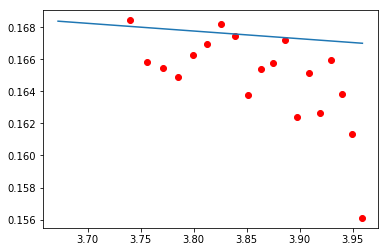

In [14]:
wavelog=np.log10(bin_ctr_200_1)
rays=np.polyfit(wavelog,rp_200_1,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))



#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.186]))(wavelog)

plt.plot(np.log10(bin_ctr_200_1[4:]),rp_200_1[4:],'.',markersize=12,color='red')
plt.plot(wavelog,raya)

# Compare to other data PLOT

In [9]:
print yerr_binns_200_1
print yerr_binns_200_2

test,yerr_binns_200=ComNights(rp_200_1,yerr_binns_200_1,rp_200_2,yerr_binns_200_2)

print yerr_binns_200
print yerr_binns_200.shape
print rp_200_1.shape
print bin_ctr_200_1.shape

[0.00124849 0.00079209 0.00064619 0.00068734 0.00063127 0.00058884
 0.0005616  0.00047665 0.00050599 0.00055392 0.0010017  0.00097814
 0.00057579 0.00056873 0.00100312 0.00104857 0.00071858 0.00079981
 0.00076377 0.00080695 0.0009813  0.00258317 0.00231777]
[0.02696774 0.00167146 0.00084263 0.00067916 0.00062355 0.000608
 0.00054723 0.00052172 0.00045783 0.00076424 0.00116655 0.00099953
 0.00060862 0.00055448 0.00182804 0.00207671 0.00082752 0.00073243
 0.00075419 0.00091863 0.00109769 0.00240708 0.00243818]
[0.00124715 0.00071579 0.00051277 0.0004831  0.00044362 0.00042298
 0.00039193 0.0003519  0.00033949 0.0004485  0.00075997 0.00069909
 0.00041827 0.00039702 0.00087942 0.00093602 0.00054257 0.00054016
 0.00053665 0.00060626 0.00073158 0.00176103 0.00167987]
(23,)
(23,)
(23,)


In [10]:
#PLOT COLORS #
ncolor=40
color_list = plt.cm.plasma(np.linspace(0., 1, ncolor))

color1=color_list[int(ncolor/3)]
color2=color_list[int(2.*ncolor/3)]

In [11]:
# COMBINE NIGHTS #
rp_200,te_200=ComNights(rp_200_1,rp_e_200_1,rp_200_2,rp_e_200_2)
rp,te=ComNights(rp_1,rp_e_1,rp_2,rp_e_2)

print '----------------'
print '   * NIGHT 1 *  '
print '----------------'
print '|   200 WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_200_1
print 'Rp/Rs: ', rp_200_1
print 'ERROR: ', rp_e_200_1
print 'e PPM: ', rp_e_200_1*10**6.

print '----------------'
print '|   '+str(int(width))+' WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_1
print 'Rp/Rs: ', rp_1
print 'ERROR: ', rp_e_1
print 'e PPM: ', rp_e_1*10**6.
print '----------------'
print '   * NIGHT 2 *  '
print '----------------'
print '|   200 WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_200_2
print 'Rp/Rs: ', rp_200_2
print 'ERROR: ', rp_e_200_2
print 'e PPM: ', rp_e_200_2*10**6.

print '----------------'
print '|   '+str(int(width))+' WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_2
print 'Rp/Rs: ', rp_2
print 'ERROR: ', rp_e_2
print 'e PPM: ', rp_e_2*10**6.
print '----------------'
print '  * COMBINED *  '
print '----------------'
print '|   200 WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_200_2
print 'Rp/Rs: ', rp_200
print 'ERROR: ', te_200
print 'e PPM: ', te_200*10**6.

print '----------------'
print '|   '+str(int(width))+' WIDTH   |'
print '----------------'
print 'BINS:  ', bin_ctr_2
print 'Rp/Rs: ', rp
print 'ERROR: ', te
print 'e PPM: ', te*10**6.



----------------
   * NIGHT 1 *  
----------------
|   200 WIDTH   |
----------------
BINS:   [4700. 4900. 5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900.
 7100. 7300. 7500. 7700. 7900. 8100. 8300. 8500. 8700. 8900. 9100.]
Rp/Rs:  [0.00036756 0.17031671 0.16814818 0.16822635 0.1684344  0.16583023
 0.16548492 0.16491822 0.16629089 0.16695125 0.16817778 0.1674823
 0.16380343 0.16536444 0.16575876 0.16720247 0.16240849 0.16514795
 0.16262531 0.16592649 0.16381827 0.16136444 0.15610696]
ERROR:  [0.00036756 0.00073121 0.00046143 0.00037799 0.00039735 0.00036176
 0.00035438 0.00033051 0.00027415 0.00028539 0.00032054 0.00055858
 0.00059157 0.00034555 0.00032898 0.00055606 0.00059911 0.00041486
 0.00046945 0.00042929 0.00046624 0.00057278 0.0015177 ]
e PPM:  [ 367.56273513  731.20738656  461.43272931  377.98810918  397.35295548
  361.76003579  354.37919286  330.50649904  274.15248256  285.39099725
  320.54166087  558.58432591  591.57277456  345.55399074  328.98347709
  556.0558256

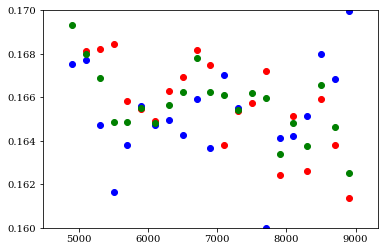

In [107]:
plt.plot(bin_ctr_200_1,rp_200_1,'.',markersize=12,color='red')
plt.plot(bin_ctr_200_2,rp_200_2,'.',markersize=12,color='blue')
plt.plot(bin_ctr_200_1,rp_200,'.',markersize=12,color='green')
plt.ylim(0.16,0.17)

plt.show()

In [12]:
# PLOT COLORS #
ncolor=40
color_list = plt.cm.plasma(np.linspace(0., 1, ncolor))

#color1=color_list[int(ncolor/3)]
#color2=color_list[int(2.*ncolor/3)]

color1='tomato'
color2='gold'
color3='grey'

In [13]:
# wavelength space errors
xerr=np.abs(np.log(bin_ctr_1/(bin_ctr_1-width/2.)))
xerr_200=np.abs(np.log(bin_ctr_200_1/(bin_ctr_200_1+100.)))

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2813: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


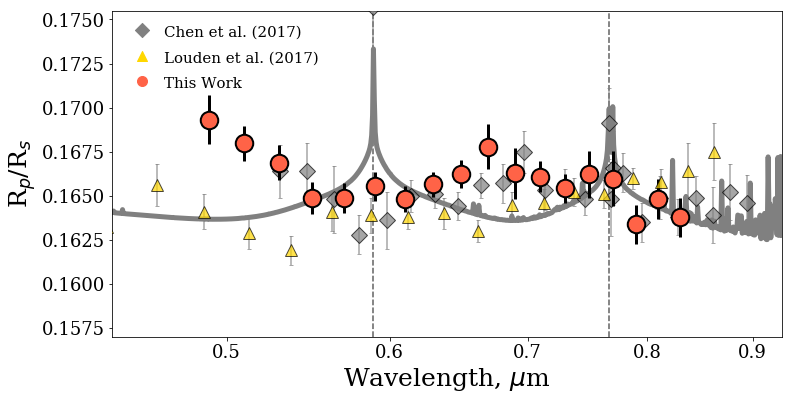

In [14]:
#Other paper data...
plot_data=200

plt.figure(figsize=(12,6))


plt.plot(np.log(exo_w),exo_d,color='gray',linewidth=5.0)
#plt.plot(np.log(exo_w_P),exo_d_P-0.002,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads,'s',markersize=12,markeredgecolor='black',markerfacecolor=color1,zorder=8,alpha=0.7)
#plt.errorbar(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads, yerr=Tetal_errs,zerr=Tetal_widt/2.,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(Cetal_wavs),Cetal_rads,'D',markersize=12,markeredgecolor='black',markerfacecolor=color3,zorder=8,alpha=0.7)
plt.errorbar(np.log(Cetal_wavs),Cetal_rads, yerr=Cetal_errs,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)


plt.plot(np.log(Letal_wavs),Letal_rads,'^',markersize=12,markeredgecolor='black',markerfacecolor=color2,zorder=10,alpha=0.7)
plt.errorbar(np.log(Letal_wavs),Letal_rads, yerr=Letal_errs,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)
    

if plot_data==200:
    plt.plot(np.log(bin_ctr_200_1[:-4]),rp_200[:-4],'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor=color1,zorder=11)
    plt.errorbar(np.log(bin_ctr_200_1[:-4]),rp_200[:-4],yerr=(te_200[:-4])+yerr_binns_200_1[:-4],fmt=None,color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)
    
else:
    plt.plot(np.log(bin_ctr_1),rp,'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor=color1,zorder=11)
    plt.errorbar(np.log(bin_ctr_1),rp,yerr=(te)+yerr_binns,color='black',fmt=None,elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)
    


#plt.xscale('log')
    

plt.ylim(0.157,0.175)

plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(9300))
plt.ylim(0.157,0.1755)

plt.yticks(fontsize=18,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)


plt.scatter(np.log(4550),0.170+0.0044,marker='D',s=100,c=color3)
plt.figtext(0.185,0.82, 'Chen et al. (2017)',fontproperties=font,fontsize=15)

plt.scatter(np.log(4550),0.1729,marker='^',s=100,c=color2)
plt.figtext(0.185,0.76, 'Louden et al. (2017)',fontproperties=font,fontsize=15)


plt.scatter(np.log(4550),0.1715,marker='o',s=100,c=color1)
plt.figtext(0.185,0.70, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)


plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')


plt.savefig(SAVEPATH1+'PLOTS/TSpec_alldata_bothnights'+str(int(width))+'.pdf')    
plt.savefig(SAVEPATH2+'PLOTS/TSpec_alldata_bothnights'+str(int(width))+'.pdf')
plt.show()

# Data compared to Model

In [15]:
### color scaling ###
bin_ctr_200=bin_ctr_200_1
bin_ctr=bin_ctr_1

import matplotlib.colors as mcolors

colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

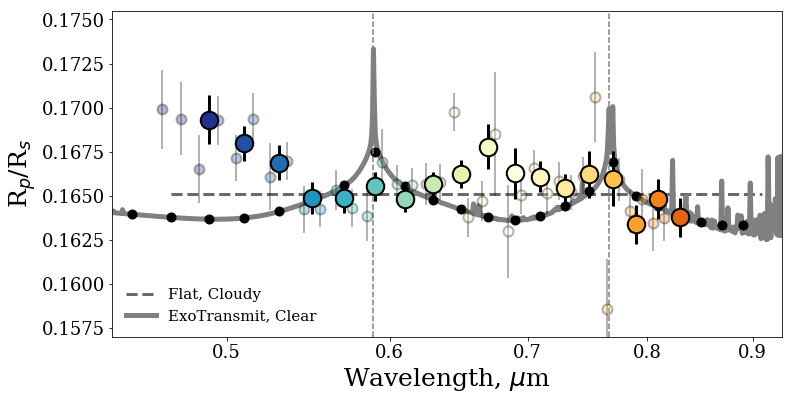

In [22]:
plt_wid=100

wavelog=np.log(bin_ctr_200_1)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))


rp_200_n=rp_200[~np.isnan(rp_200)]
wavelog_n=wavelog[~np.isnan(rp_200)]
lins=np.polyfit(wavelog_n[2:],rp_200_n[2:],0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

                
plt.figure(figsize=(12,6)) 


#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
plt.plot(wavelog,lin,color='dimgrey',linewidth=3.0,linestyle='--',label='Flat, Cloudy')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d,color='gray',linewidth=5.0,label='ExoTransmit, Clear')
plt.plot(np.log(exo_w_P),exo_d_P,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(mwave),model,color='dimgrey',linewidth=2.0,linestyle='--')


for b in range(0,len(bin_ctr_200)):
    if b>len(bin_ctr_200)-5:
        continue
#if b==1:
#    continue
#    if blen(bin_ctr_200)-4:
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=35,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=(te_200[b])+yerr_binns_200_1[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=10)

for b in range(0,len(bin_ctr_1)):
#     if plt_wid==100:
#         if b==29 or b==30:
#             continue
#if b==1:
#    continue
    if b>len(bin_ctr_1)-10:
        continue
    plt.plot(np.log(bin_ctr_1[b]),rp[b],'.', markeredgewidth=2.0,markersize=20,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=10,alpha=0.3)
    plt.errorbar(np.log(bin_ctr_1[b]),rp[b],yerr=te[b]+yerr_binns_1[b],color='black',elinewidth=2.0,capsize=0.0,capthick=2.0,zorder=10,alpha=0.3)


plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(9300))
#plt.ylim(0.160,0.175)
plt.ylim(0.157,0.1755)


plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.15,0.82,'--  Flat Spectra', color='black',fontsize=18,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.15,0.77,' -  Exotransmit Model', color='black',fontsize=18,fontproperties=fontb)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
plt.legend(loc='lower left',frameon=False,fontsize=15)
#plt.show()
plt.savefig(SAVEPATH1+'PLOTS/TSpec_bothnights'+str(int(width))+'.pdf')    
plt.savefig(SAVEPATH2+'PLOTS/TSpec_bothnights'+str(int(width))+'.pdf')  

plt.show()

In [ ]:
#em=10



#wavelog=np.log(bin_ctr_200)
#rays=np.polyfit(wavelog,rp_200,1)
#ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))


rp_200_n=rp_200[~np.isnan(rp_200)]
wavelog_n=wavelog[~np.isnan(rp_200)]
lins=np.polyfit(wavelog_n[2:],rp_200_n[2:],0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
#Rs=6.4*10**10.
#Tplan=1600.   #temperature of planet in K
#gplan=1707.   # gravity in cm/s^2

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

                
            
            
plt.figure(figsize=(12,6)) 

#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
plt.plot(wavelog,lin,color='dimgrey',linewidth=3.0,linestyle='--')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d-0.002,color='gray',linewidth=5.0)
#plt.plot(np.log(exo_w_P),exo_d_P-0.002,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')


#for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==2 or b==5:
#        continue
    #if b==0 or b==1 or b==2 or b==3 or b==4 or b==5 or b==6 or b==10 or b==11 or b==24 or b==64:# or b==3 or b==11 or b==17:
    #    continue
#    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=em*(te[b]),xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

for b in range(0,len(bin_ctr_200)):
#     if b==0 or b==1:# or b==3 or b==11 or b==17:
#         continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=em*(te_200[b]),xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))
#plt.ylim(0.160,0.175)

plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.15,0.82,'--  Flat Spectra', color='black',fontsize=18,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.15,0.77,' -  Exotransmit Model', color='black',fontsize=18,fontproperties=fontb)

#plt.scatter(np.log(4550),0.1693,marker='D',s=100,c='purple')
#plt.figtext(0.185,0.8155, 'Chen et al. (2017)',fontproperties=font,fontsize=15)

#plt.scatter(np.log(4550),0.16845,marker='^',s=100,c='green')
#plt.figtext(0.185,0.75, 'Louden et al. (2017)',fontproperties=font,fontsize=15)

#plt.scatter(np.log(4550),0.1676,marker='o',s=100,c='orange')
#plt.figtext(0.185,0.6845, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
plt.show()
#plt.savefig(SAVEPATH1+'PLOTS/TSpec_bothnights'+str(int(width))+'.eps')    
#plt.savefig(SAVEPATH2+'PLOTS/TSpec_bothnights'+str(int(width))+'.eps')  

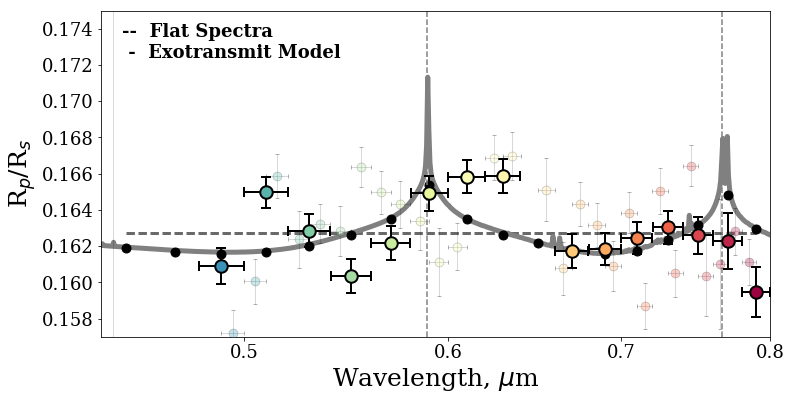

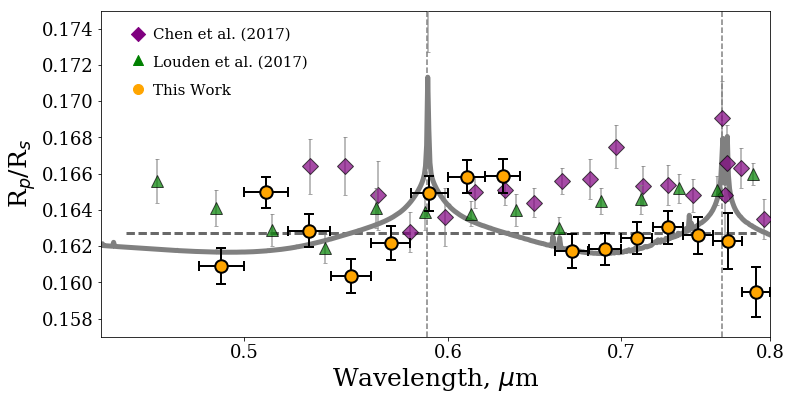

[        inf  0.00473772  0.          0.00154942  0.00130707  0.00124071
  0.00124149  0.00121504  0.00121856  0.00122091  0.00122907  0.00186369
  0.00140039  0.00121914  0.00127379  0.00134448  0.00158016  0.00144615]


[ 0.          0.          0.16366697  0.16459078  0.1632091   0.16283775
  0.16441432  0.1643951   0.16397019  0.16395696  0.16329322  0.16477642
  0.16502356  0.16433976  0.16487593  0.16231485  0.16449727]
[ 0.16401081] [ 0.16401081  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081
  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081
  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081]


In [21]:
import os

bin_ctr=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']

c1_1=np.empty([len(bin_ctr)])*np.nan
c2_1=np.empty([len(bin_ctr)])*np.nan

c1_2=np.empty([len(bin_ctr)])*np.nan
c2_2=np.empty([len(bin_ctr)])*np.nan

c1_err_1=np.empty([len(bin_ctr)])*np.nan
c2_err_1=np.empty([len(bin_ctr)])*np.nan

c1_err_2=np.empty([len(bin_ctr)])*np.nan
c2_err_2=np.empty([len(bin_ctr)])*np.nan

b=0
for file in os.listdir(SAVEPATH1+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            c1white_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[5]
            c2white_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[6]
        else:
            c1_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[5]
            c2_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[6]
            c1_err_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_200/'+file)['paramserr'])[1])
            c2_err_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_200/'+file)['paramserr'])[2])

            b+=1

b=0
for file in os.listdir(SAVEPATH2+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            print b, file
#            c1white_2=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[5]
#            c2white_2=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[6]
        else:
            c1_2[b]=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[5]+0.1
            c2_2[b]=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[6]+0.1
            c1_err_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_200/'+file)['paramserr'])[1])
            c2_err_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_200/'+file)['paramserr'])[2])

            b+=1
        
print c2_1
print c2_2


[-0.0618008  -0.02319756 -0.00940007  0.05234523  0.05351732  0.07095742
  0.09766918  0.09741206  0.10672621  0.15722046  0.10334011  0.15816652
  0.11532714  0.1234983   0.12180803  0.17761808  0.15099756  0.18646677
  0.15679865  0.131801    0.15728387  0.20963182  0.14533551]
[0.10864301 0.09071698 0.10381064 0.11605682 0.16383182 0.15450621
 0.1645657  0.16945514 0.18951037 0.19611041 0.21359692 0.20382177
 0.20555223 0.22532089 0.21216559 0.23285582 0.24570519 0.24098052
 0.25256708 0.2450074  0.23173089 0.26411505 0.2628592 ]


(-0.15, 1.1)

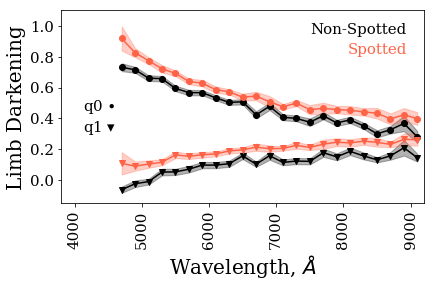

In [22]:
ft_c='tomato'
bins=bin_ctr

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.15,right=0.99)

plt.plot(bins,c1_1,color='black')
plt.plot(bins,c1_2,color=ft_c)
plt.plot(bins,c1_1,'o',color='black')
plt.plot(bins,c1_2,'o',color=ft_c)

plt.plot(bins,c2_1,color='black')
plt.plot(bins,c2_2,color=ft_c)
plt.plot(bins,c2_1,'v',color='black')
plt.plot(bins,c2_2,'v',color=ft_c)

plt.fill_between(bins,c1_1-c1_err_1,c1_1+c1_err_1,color='black',alpha=0.3)
plt.fill_between(bins,c2_1-c2_err_1,c2_1+c2_err_1,color='black',alpha=0.3)

plt.fill_between(bins,c1_2-c1_err_2,c1_2+c1_err_2,color=ft_c,alpha=0.3)
plt.fill_between(bins,c2_2-c2_err_2,c2_2+c2_err_2,color=ft_c,alpha=0.3)

plt.figtext(0.95,0.87,'Non-Spotted',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Spotted',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\AA$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3800,9200)
plt.ylim(-0.15,1.1)

#plt.savefig('/Users/ermay/Documents/GradSchool/Research_Observing/Paper1/plots/limb_dark_act.pdf')


In [24]:
print '****** NIGHT1 ******'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(c1_1[b],4), np.round(c1_err_1[b],5),'--', np.round(c2_1[b],4), np.round(c2_err_1[b],5)
print '****** NIGHT2 ******'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(c1_2[b],3), np.round(c1_err_2[b],3),'--', np.round(c2_2[b],3), np.round(c2_err_2[b],3)
    

****** NIGHT1 ******
4700.0 0.7315 0.02556 -- -0.0618 0.02035
4900.0 0.7149 0.01924 -- -0.0232 0.02167
5100.0 0.6608 0.01891 -- -0.0094 0.01839
5300.0 0.6573 0.01793 -- 0.0523 0.02195
5500.0 0.5941 0.01766 -- 0.0535 0.02045
5700.0 0.5674 0.01807 -- 0.071 0.02133
5900.0 0.5664 0.01706 -- 0.0977 0.02098
6100.0 0.533 0.01618 -- 0.0974 0.02017
6300.0 0.5038 0.01645 -- 0.1067 0.02023
6500.0 0.5075 0.01691 -- 0.1572 0.02086
6700.0 0.4231 0.0235 -- 0.1033 0.0173
6900.0 0.4782 0.02362 -- 0.1582 0.0264
7100.0 0.4073 0.01942 -- 0.1153 0.01912
7300.0 0.4001 0.01851 -- 0.1235 0.02021
7500.0 0.3752 0.02454 -- 0.1218 0.02009
7700.0 0.4175 0.02408 -- 0.1776 0.02661
7900.0 0.371 0.01987 -- 0.151 0.02263
8100.0 0.3903 0.021 -- 0.1865 0.02394
8300.0 0.3516 0.02012 -- 0.1568 0.0227
8500.0 0.3004 0.02304 -- 0.1318 0.01678
8700.0 0.3266 0.02453 -- 0.1573 0.02481
8900.0 0.3671 0.04986 -- 0.2096 0.05063
9100.0 0.2801 0.03715 -- 0.1453 0.02527
****** NIGHT2 ******
4700.0 0.918 0.078 -- 0.109 0.072
4900.0 0.82

In [25]:
bin_ctr_200=bin_ctr

print '****** NIGHT1 ******'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(rp_200_1[b],4), np.round(rp_e_200_1[b]+yerr_binns_200_1[b],5)
print '****** NIGHT2 ******'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(rp_200_2[b],4), np.round(rp_e_200_2[b]+yerr_binns_200_2[b],5)
print '****** COMBINED ******'
for b in range(0,len(bin_ctr_200)):
    print bin_ctr_200[b], np.round(rp_200[b],4), np.round(te_200[b]+yerr_binns_1[b],4)
    

****** NIGHT1 ******
4700.0 0.0004 0.00162
4900.0 0.1703 0.00152
5100.0 0.1681 0.00111
5300.0 0.1682 0.00107
5500.0 0.1684 0.00103
5700.0 0.1658 0.00095
5900.0 0.1655 0.00092
6100.0 0.1649 0.00081
6300.0 0.1663 0.00078
6500.0 0.167 0.00084
6700.0 0.1682 0.00132
6900.0 0.1675 0.00154
7100.0 0.1638 0.00117
7300.0 0.1654 0.00091
7500.0 0.1658 0.00133
7700.0 0.1672 0.0016
7900.0 0.1624 0.00132
8100.0 0.1651 0.00121
8300.0 0.1626 0.00123
8500.0 0.1659 0.00124
8700.0 0.1638 0.00145
8900.0 0.1614 0.00316
9100.0 0.1561 0.00384
****** NIGHT2 ******
4700.0 0.1078 0.03557
4900.0 0.1675 0.00265
5100.0 0.1677 0.0014
5300.0 0.1647 0.00115
5500.0 0.1616 0.001
5700.0 0.1638 0.00099
5900.0 0.1656 0.00092
6100.0 0.1647 0.00089
6300.0 0.165 0.00074
6500.0 0.1643 0.00123
6700.0 0.1659 0.00187
6900.0 0.1637 0.00182
7100.0 0.167 0.00099
7300.0 0.1655 0.00092
7500.0 0.1706 0.00284
7700.0 0.16 0.0033
7900.0 0.1641 0.00135
8100.0 0.1642 0.00127
8300.0 0.1651 0.00126
8500.0 0.168 0.00156
8700.0 0.1668 0.00185
8